In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [98]:
feature = pd.read_csv('classification_feat.csv')
predictor = pd.read_csv('classification_pred.csv', header = 0)
feature['Quarter end'] = pd.to_datetime(feature['Quarter end'])
feature.set_index("Quarter end", inplace=True)
predictor = predictor.drop(columns = 'Unnamed: 0')

In [99]:
y = predictor

X  = feature

In [100]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [101]:
dummy = DummyClassifier()
dummy = dummy.fit(X_train, y_train)

test_preds = dummy.predict(X_test)

print("Accuracy Score Found: ")
print(accuracy_score(y_test, test_preds) *100)
print("\nRecall Score Found: ")
print(recall_score(y_test, test_preds)* 100)


# Accuracy Score Found: 
# 51.36326286696048

# Recall Score Found: 
# 41.4491695564884

Accuracy Score Found: 
51.36326286696048

Recall Score Found: 
41.44916955648841


In [120]:
labels = ['Value', 'Growth']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greys):
    
    # Compute confusion matrix
#     cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
#     print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [103]:
dummy_cv_score = cross_val_score(dummy, X_train, y_train, cv=3)
mean_dummy_cv_score = np.mean(dummy_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dummy_cv_score * 100))

# Mean Cross Validation Score: 51.34%

Mean Cross Validation Score: 51.34%


In [104]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

# Accuracy Score: 0.5136326286696048
# Precision Score: 0.4074273412271259
# Recall Score: 0.4144916955648841
# F1 Score: 0.410929159504207

#               precision    recall  f1-score   support

#            0       0.59      0.58      0.59      7908
#            1       0.41      0.41      0.41      5479

#     accuracy                           0.51     13387
#    macro avg       0.50      0.50      0.50     13387
# weighted avg       0.51      0.51      0.51     13387

Accuracy Score: 0.5136326286696048
Precision Score: 0.4074273412271259
Recall Score: 0.4144916955648841
F1 Score: 0.410929159504207

              precision    recall  f1-score   support

           0       0.59      0.58      0.59      7908
           1       0.41      0.41      0.41      5479

    accuracy                           0.51     13387
   macro avg       0.50      0.50      0.50     13387
weighted avg       0.51      0.51      0.51     13387



In [113]:
confusion_matrix(y_test,test_preds)

array([[4605, 3303],
       [3208, 2271]])

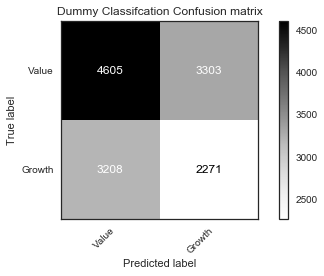

              precision    recall  f1-score   support

           0       0.59      0.58      0.59      7908
           1       0.41      0.41      0.41      5479

    accuracy                           0.51     13387
   macro avg       0.50      0.50      0.50     13387
weighted avg       0.51      0.51      0.51     13387



In [123]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds,classes = labels,title='Dummy Classifcation Confusion matrix')

plt.show()

print(classification_report(y_test, test_preds))